## Pandas를 활용한 데이터 분석

pip를 통해, pandas를 설치 한다

In [1]:
!pip install pandas

textract 1.6.1 has requirement chardet==2.3.0, but you'll have chardet 3.0.4 which is incompatible.
spyder-kernels 0.2.6 has requirement ipykernel>=4.8.2, but you'll have ipykernel 4.8.1 which is incompatible.
spyder-kernels 0.2.6 has requirement jupyter-client>=5.2.3, but you'll have jupyter-client 5.2.2 which is incompatible.
spyder-kernels 0.2.6 has requirement pyzmq>=17, but you'll have pyzmq 16.0.4 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Pandas를 활용하여 선수들의 소속팀 세어보기

#### Pandas

- 주요 자료구조는 DataFrame인데, 테이블이나 엑셀의 스프레드시트 같은 형태와 비슷하다

In [2]:
import pandas as pd

In [3]:
# pandas를 통해 데이터를 읽어온다
players = pd.read_csv('./data/2018_worldcup_players.tsv', sep='\t')
players.shape

(736, 8)

In [4]:
# 데이터의 숫자 통계값들을 확인한다
players.describe()

,id,num,height
count,736.000000,736.00000,736.000000
mean,380.269022,12.00000,182.442935
std,230.037260,6.63776,6.858492
min,1.000000,1.00000,165.000000
25%,184.750000,6.00000,178.000000
50%,368.500000,12.00000,183.000000
75%,553.250000,18.00000,187.000000
max,801.000000,23.00000,201.000000


In [5]:
# 예제 record를 확인한다
players.head()

,id,country,num,name,club,birth,height,position
0,1,Saudi Arabia,1,ABDULLAH ALMUAIOUF,Al Hilal (KSA),23/01/87,178,GK
1,2,Saudi Arabia,3,OSAMA HAWSAWI,Al Hilal (KSA),31/03/84,188,DF
2,3,Saudi Arabia,5,OMAR HAWSAWI,Al Nasr (KSA),27/09/85,185,DF
3,4,Saudi Arabia,6,MOHAMMED ALBURAYK,Al Hilal (KSA),15/09/92,173,DF
4,5,Saudi Arabia,7,SALMAN ALFARAJ,Al Hilal (KSA),01/08/89,179,MF


In [6]:
# 데이터 중 비어있는 값이 있는지 확인하자
players.isnull()[:10]

,id,country,num,name,club,birth,height,position
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [7]:
players.isnull().sum()

id          0
country     0
num         0
name        0
club        0
birth       0
height      0
position    0
dtype: int64

In [8]:
# Dataframe의 컬럼만을 확인하는 것도 가능하다
players.club[:10]

0    Al Hilal (KSA)
1    Al Hilal (KSA)
2     Al Nasr (KSA)
3    Al Hilal (KSA)
4    Al Hilal (KSA)
5     Leganes (ESP)
6     Al Nasr (KSA)
7    Al Hilal (KSA)
8    Al Hilal (KSA)
9     Al Ahli (KSA)
Name: club, dtype: object

In [9]:
# Dataframe의 각 컬럼은 Series객체로 반환된다
# Series에는 value_counts()라는 메소드로 각 값에 대한 갯수를 확인할 수 있다
club_count = players.club.value_counts()
club_count

Manchester City (ENG)          16
Real Madrid (ESP)              15
FC Barcelona (ESP)             14
Chelsea (ENG)                  12
Tottenham Hotspur (ENG)        12
Paris Saint-Germain (FRA)      11
Bayern München (GER)           11
Manchester United (ENG)        11
Juventus (ITA)                 11
Atlético Madrid (ESP)           9
Al Ahli (KSA)                   9
Al Hilal (KSA)                  9
Leicester (ENG)                 8
AS Monaco (FRA)                 8
Liverpool (ENG)                 7
Sporting CP (POR)               7
Borussia Moenchengla. (GER)     7
Arsenal (ENG)                   7
Borussia Dortmund (GER)         7
SSC Napoli (ITA)                6
Sevilla FC (ESP)                6
Lokomotiv Moskva (RUS)          6
Zenit St. Petersburg (RUS)      6
CSKA Moskva (RUS)               6
Al Ahly Cairo (EGY)             6
Eintracht Frankfurt (GER)       6
Benfica (POR)                   5
Stoke (ENG)                     5
Deportivo La Coruña (ESP)       5
Sampdoria (ITA

In [10]:
# 순수 파이썬이었다면....
def get_counts(club_list):
    counts = {}
    for x in club_list:
        if x in counts:
            counts[x] += 1
        else:
            counts[x]  = 1
    return counts

get_counts(players.club.tolist())

{'1899 Hoffenheim (GER)': 2,
 'AA Gent (BEL)': 4,
 'AC Milan (ITA)': 5,
 'ADO Den Haag (NED)': 1,
 'AEK Athinai (GRE)': 1,
 'AS Monaco (FRA)': 8,
 'AS Roma (ITA)': 3,
 'AZ (NED)': 1,
 'AaB (DEN)': 1,
 'Aberdeen (SCO)': 1,
 'Adanaspor (TUR)': 1,
 'Ajax (NED)': 4,
 'Al Ahli (KSA)': 9,
 'Al Ahly Cairo (EGY)': 6,
 'Al Ain (UAE)': 1,
 'Al Batin Football Cl.': 1,
 'Al Fath (KSA)': 1,
 'Al Gharrafa (QAT)': 1,
 'Al Hilal (KSA)': 9,
 'Al Ittifaq (KSA)': 1,
 'Al Ittihad (Jeddah) (KSA)': 1,
 'Al Jazeira (UAE)': 1,
 'Al Masry (EGY)': 1,
 'Al Nasr (KSA)': 3,
 'Al Sadd (QAT)': 1,
 'Al Shabab (KSA)': 3,
 'Al Taawoun Football. (KSA)': 1,
 'Al-Raed Sports Club (KSA)': 1,
 'Alajuelense (CRC)': 3,
 'Alavés (ESP)': 1,
 'Alianza Lima (PER)': 1,
 'America (MEX)': 3,
 'Amiens (FRA)': 1,
 'Anderlecht (BEL)': 4,
 'Antalyaspor (TUR)': 1,
 'Arsenal (ENG)': 7,
 'Arsenal Tula (RUS)': 1,
 'Asan Mugunghwa Footb. (KOR)': 1,
 'Aston Villa (ENG)': 3,
 'Atalanta Bergamo (ITA)': 2,
 'Athletic Club (ESP)': 1,
 'Atlas (MEX

### matplotlib를 활용해 위의 결과로 그래프를 그려보기

In [11]:
!pip install matplotlib

textract 1.6.1 has requirement chardet==2.3.0, but you'll have chardet 3.0.4 which is incompatible.
spyder-kernels 0.2.6 has requirement ipykernel>=4.8.2, but you'll have ipykernel 4.8.1 which is incompatible.
spyder-kernels 0.2.6 has requirement jupyter-client>=5.2.3, but you'll have jupyter-client 5.2.2 which is incompatible.
spyder-kernels 0.2.6 has requirement pyzmq>=17, but you'll have pyzmq 16.0.4 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
import matplotlib

In [13]:
club_count[:10].plot(kind='barh', rot=0)

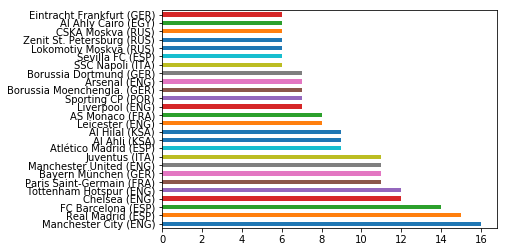

In [14]:
club_count_more_than_5 = club_count.where(lambda x : x>5).dropna()
club_count_more_than_5.plot(kind='barh', rot=0)

### 클럽팀의 나라 세보기

- 

In [57]:
# club 정보에서 해당 클럽의 나라 정보 찾기
players['club_country'] = players.club.str.split('(').str[1].str.strip(')')
players.club_country

0      KSA
1      KSA
2      KSA
3      KSA
4      KSA
5      ESP
6      KSA
7      KSA
8      KSA
9      KSA
10     ESP
11     KSA
12     ESP
13     KSA
14     RUS
15     RUS
16     RUS
17     RUS
18     RUS
19     RUS
20     RUS
21     RUS
22     RUS
23     RUS
24     RUS
25     ESP
26     RUS
27     RUS
28     EGY
29     ENG
      ... 
706    FRA
707    ITA
708    ITA
709    WAL
710    JPN
711    JPN
712    KOR
713    JPN
714    ENG
715    GER
716    PAN
717    PAN
718    PAN
719    ENG
720    ENG
721    ITA
722    ENG
723    FRA
724    FRA
725    BEL
726    TUR
727    ITA
728    COL
729    PAR
730    COL
731    JPN
732    JPN
733    JPN
734    JPN
735    JPN
Name: club_country, Length: 736, dtype: object

In [58]:
# 정규식을 활용해 추출하는 메소드 extract()를 제공한다
# players.club.str.extract(r'([(])([A-Z]+)([)])', expand=False)